# SEND-IT: Sentiment Analysis on Parameter-Efficient Neural Distillate with Iterative Fine Tuning

A Georgia Tech (CS 7650) Natural Language Processing final class project

Collaborators: Priya Tamilselvan, Jack Henderson, Saaliha Allaudin, Thanasis Taprantzis

**About:**

This project is the culmination of the work of four computer science master's students at Georgia Tech over the course of a semester in the Natural Language Processing graduate course taught by Dr. Alan Ritter, as an extension of some of the topics covered there.

**A short summary:**

The aims of this project, which are refined and expressed more eloquently through the publication this work aided us in composing, are to examine the performative differences between two primary parameter-efficient fine-tuning techniques used in natural language model refinement, namely BitFit and LoRA, and evaluate these and other techniques (such as model distillation) in a binary sentiment analysis task on the Sentiment140 dataset, which amasses 1.6m Tweets flagged as positive or negative in sentiment, all made possible by open-use of Meta AI's Open Pre-trained Transformer 125m parameter model (OPT-125m), which is the target of the noted model distillation.

README:

This .ipynb notebook serves the purpose of generating publication visuals from the saved .csv model outputs generated in OPT125M_Sentiment140.ipynb, where training and inference is performed.

In [1]:
""" First we install our necessary visualization packages and import them """

!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
""" Output from our OPT125M_Sentiment140.ipynb file, we read in the .csv files here.
Note that these .csv file paths suggest they should be uploaded to session storage"""

bf_results = pd.read_csv('/bitfit_results.csv')
bf_epochs = pd.read_csv('/bitfit_epoch_logs.csv')
lora_results = pd.read_csv('/lora_results.csv')
lora_epochs = pd.read_csv('/lora_epoch_logs.csv')

bf_inf = pd.read_csv('/bitfit_inference_metrics_summary.csv')
lora_inf = pd.read_csv('/lora_inference_metrics_summary.csv')

bf_preds = pd.read_csv('/bitfit_inference_predictions.csv')
lora_preds = pd.read_csv('/lora_inference_predictions.csv')

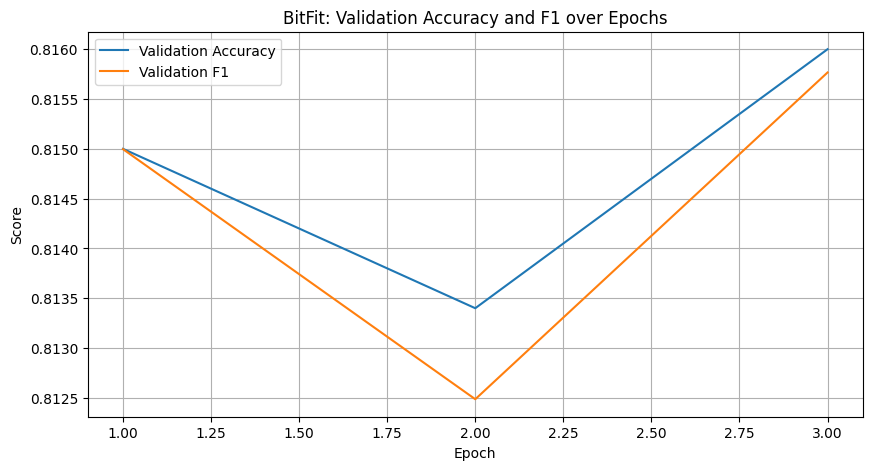

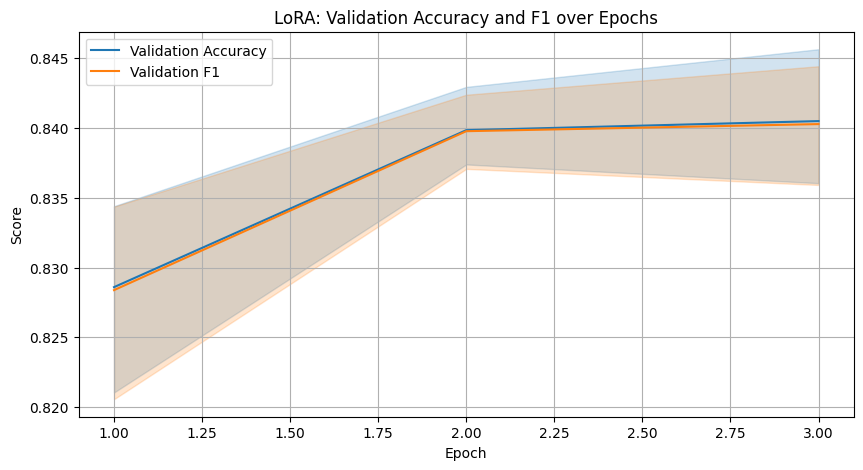

In [8]:
""" From our per-epoch logs, we can construct learning curves
to visualize how well our training generalizes"""

# BitFit Learning Curves (Val Acc and F1 Score)
plt.figure(figsize=(10,5))
sns.lineplot(data=bf_epochs, x="epoch", y="val_accuracy", label="Validation Accuracy")
sns.lineplot(data=bf_epochs, x="epoch", y="val_f1", label="Validation F1")
plt.title("BitFit: Validation Accuracy and F1 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# LoRA Learning Curves (Val Acc and F1 Score)
plt.figure(figsize=(10,5))
sns.lineplot(data=lora_epochs, x="epoch", y="val_accuracy", label="Validation Accuracy")
sns.lineplot(data=lora_epochs, x="epoch", y="val_f1", label="Validation F1")
plt.title("LoRA: Validation Accuracy and F1 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
""" Next we generate a table of the final validation results for BitFit and LoRA to compare them
across metrics of accuracy, f1-score, runtime [s] and memory usage [MB] """

print("\nFinal Validation Performance (BitFit vs LoRA):")

comparison = pd.DataFrame({
    "Method": ["BitFit", "LoRA"],
    "Best Validation F1": [bf_results["best_val_f1"].max(), lora_results["best_val_f1"].max()],
    "Best Validation Accuracy": [bf_results["val_accuracy"].max(), lora_results["val_accuracy"].max()],
    "Runtime (sec)": [bf_results["runtime_sec"].sum(), lora_results["runtime_sec"].sum()],
    "Memory Usage (MB)": [bf_results["memory_delta_mb"].sum(), lora_results["memory_delta_mb"].sum()]
})

display(comparison)


Final Validation Performance (BitFit vs LoRA):


,Method,Best Validation F1,Best Validation Accuracy,Runtime (sec),Memory Usage (MB)
0,BitFit,0.831165,0.8312,6557.558143,0.269531
1,LoRA,0.847686,0.8478,6809.665132,3.640625


In [10]:
""" We can also evaluate the final performance on inference across metrics of
test accuracy, f1-score (macro and weighted) and inference time [s] """

print("\nTest Set Inference Results:")

final_test_results = pd.DataFrame({
    "Method": ["BitFit", "LoRA"],
    "Test Accuracy": [bf_inf.loc[0, "accuracy"], lora_inf.loc[0, "accuracy"]],
    "F1 Macro": [bf_inf.loc[0, "f1_macro"], lora_inf.loc[0, "f1_macro"]],
    "F1 Weighted": [bf_inf.loc[0, "f1_weighted"], lora_inf.loc[0, "f1_weighted"]],
    "Inference Time (sec)": [bf_inf.loc[0, "inference_time_sec"], lora_inf.loc[0, "inference_time_sec"]]
})

display(final_test_results)


Test Set Inference Results:


,Method,Test Accuracy,F1 Macro,F1 Weighted,Inference Time (sec)
0,BitFit,0.8274,0.827011,0.827011,28.506807
1,LoRA,0.8414,0.841227,0.841227,31.114589


In [14]:
""" Save figures for publication """
plt.savefig("bitfit_learning_curve.png")
plt.savefig("lora_learning_curve.png")

<Figure size 640x480 with 0 Axes>